<a href="https://colab.research.google.com/github/manisha-nair28/Pistachio-Species-Classification/blob/main/Pistachio_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files

uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length "{length}" bytes'.format(name=fn, length=len(uploaded[fn])))

Saving Pistachio_Features_Dataset_modified.csv to Pistachio_Features_Dataset_modified (1).csv
User uploaded file "Pistachio_Features_Dataset_modified.csv" with length "253284" bytes


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading the dataset
df=pd.read_csv('Pistachio_Features_Dataset_modified.csv')
print(df.head())
print(df.tail())

    AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  SOLIDITY  \
0  63391   1568.405    390.3396    236.7461        0.7951  284.0984    0.8665   
1  68358   1942.187    410.8594    234.7525        0.8207  295.0188    0.8765   
2  73589   1246.538    452.3630    220.5547        0.8731  306.0987    0.9172   
3  71106   1445.261    429.5291    216.0765        0.8643  300.8903    0.9589   
4  80087   1251.524    469.3783    220.9344        0.8823  319.3273    0.9657   

   CONVEX_AREA  EXTENT  ASPECT_RATIO  ROUNDNESS  COMPACTNESS  SHAPEFACTOR_1  \
0        73160  0.6394        1.6488     0.3238       0.7278         0.0062   
1        77991  0.6772        1.7502     0.2277       0.7181         0.0060   
2        80234  0.7127        2.0510     0.5951       0.6767         0.0061   
3        74153  0.7028        1.9879     0.4278       0.7005         0.0060   
4        82929  0.7459        2.1245     0.6425       0.6803         0.0059   

   SHAPEFACTOR_2  SHAPEFACTOR_3  SHAPE

In [ ]:
# Print the column name of dataset
print(df.columns)
# Total rows and columns in the dataset
print("(Rows, Columns): ",df.shape)
# Check if there is any missing value in the dataset
df.isna().any()


Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4'],
      dtype='object')
(Rows, Columns):  (2148, 16)


AREA             False
PERIMETER        False
MAJOR_AXIS       False
MINOR_AXIS       False
ECCENTRICITY     False
EQDIASQ          False
SOLIDITY         False
CONVEX_AREA      False
EXTENT           False
ASPECT_RATIO     False
ROUNDNESS        False
COMPACTNESS      False
SHAPEFACTOR_1    False
SHAPEFACTOR_2    False
SHAPEFACTOR_3    False
SHAPEFACTOR_4    False
dtype: bool

In [ ]:
# Selecting the rows and columns(all rows and 2 colummns named 'perimeter' and 'roundness')
X= df.iloc[:,[1, 10]]
print(X)

      PERIMETER  ROUNDNESS
0     1568.4050     0.3238
1     1942.1870     0.2277
2     1246.5380     0.5951
3     1445.2610     0.4278
4     1251.5240     0.6425
...         ...        ...
2143  1157.1160     0.8070
2144  2327.3459     0.1988
2145  1255.6190     0.8061
2146  1195.2150     0.8569
2147  2356.9080     0.1775

[2148 rows x 2 columns]


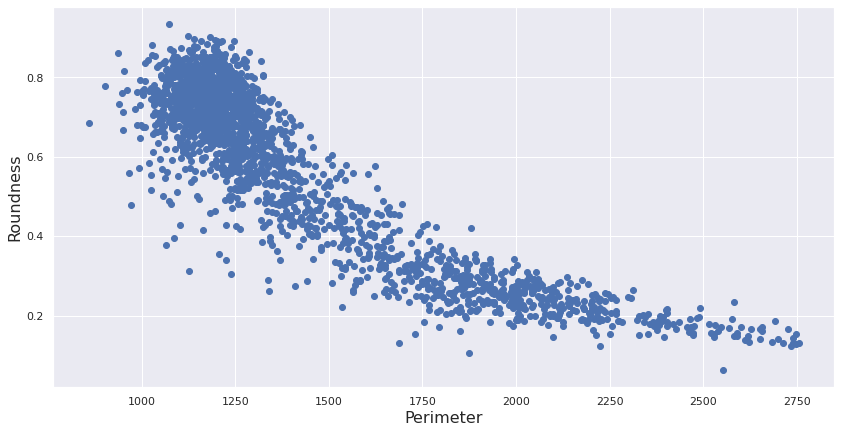

In [ ]:
# Plotting the points before clustering
# Image sizing
plt.figure(figsize=(14,7))
# Plotting the scattered graph
plt.scatter(x= X.iloc[:, 0], y=X.iloc[:, 1])
plt.xlabel('Perimeter', fontsize=16)
plt.ylabel('Roundness', fontsize=16)
plt.show()

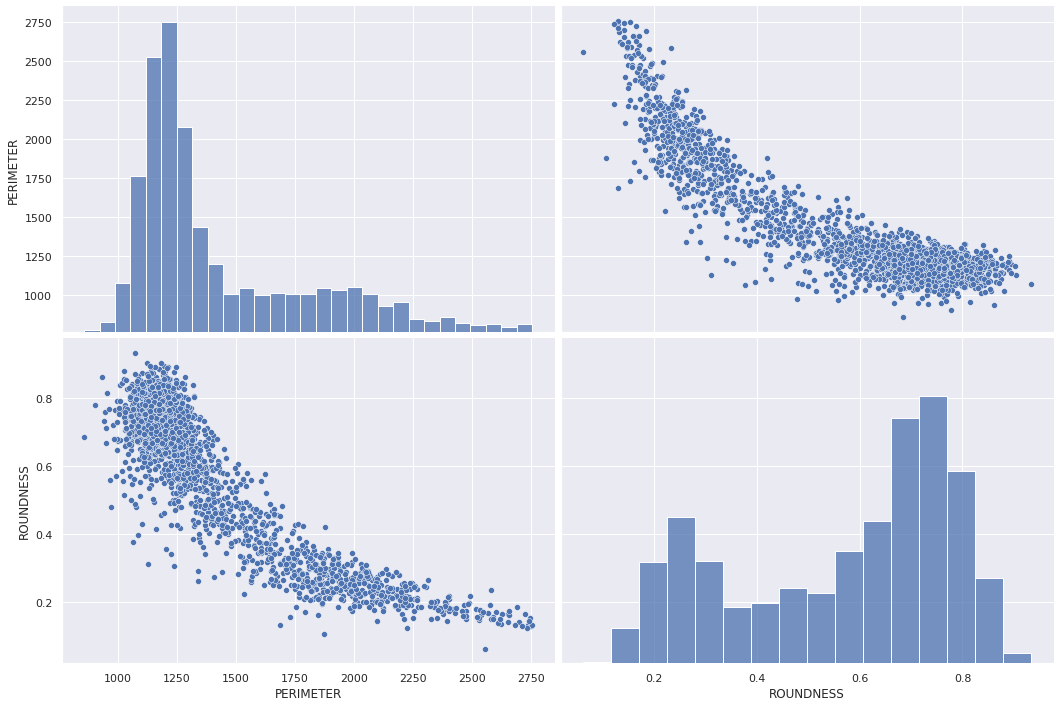

In [ ]:
# Visualizing the correlation of data (perimeter and roundness)
import seaborn
seaborn.pairplot(X,height=5, aspect=1.5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


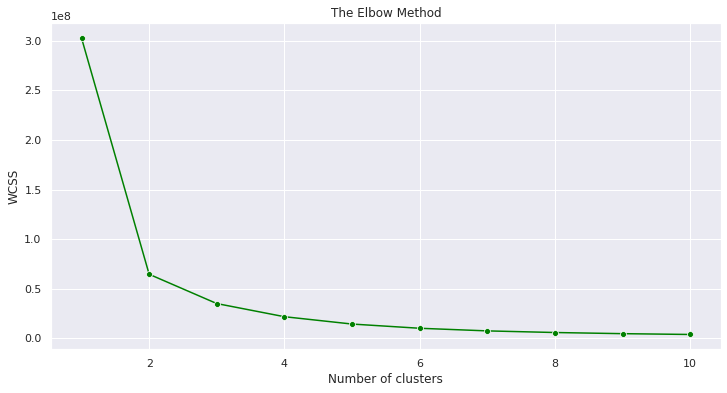

In [ ]:
# Using the elbow method to find the number of clusters
from sklearn.cluster import KMeans

# Storing WCSS (Within-Cluster-Sum-of-Squares)
wcss = []

for i in range(1, 11):
    
    # k-mean cluster model for different k values
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)
    
# Image size
plt.figure(figsize=(12,6))
seaborn.lineplot(range(1, 11), wcss,marker='o',color='green')

# labeling
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

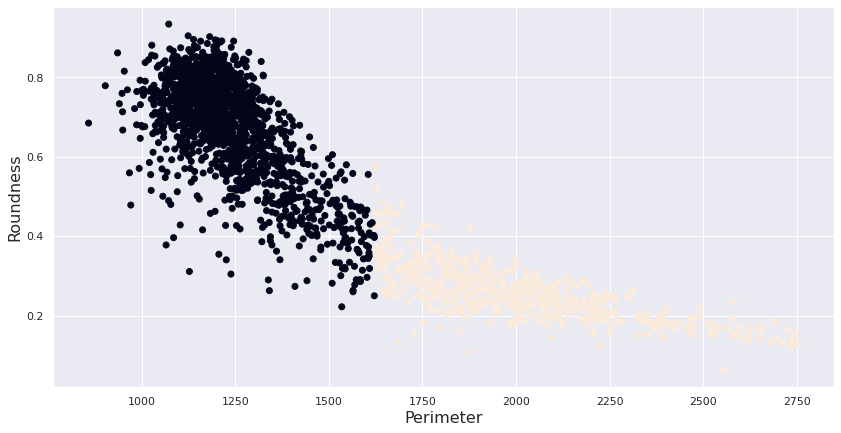

In [ ]:
# importing the k-means module
from sklearn.cluster import KMeans

# set cluster size = 2
km = KMeans(n_clusters = 2)
km.fit(X)
km.cluster_centers_

# plotting the graph of the clusters
plt.figure(figsize=(14,7))
plt.scatter(x= X.iloc[:, 0], y=X.iloc[:, 1], c=km.labels_)
plt.xlabel('Perimeter', fontsize=16)
plt.ylabel('Roundness', fontsize=16)
plt.show()

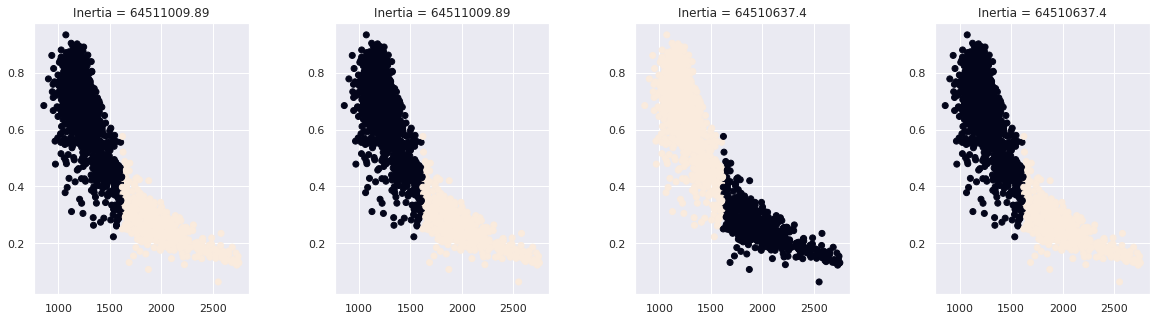

In [ ]:
# Plotting graph for different random states
# creating graph in one line
fig, ax = plt.subplots(1, 4, gridspec_kw={'wspace': 0.4}, figsize=(20,5))
 
for i in range(4):
    km = KMeans(n_clusters = 2, init='random', n_init=1, random_state=i)
    km.fit(X)
    ax[i].scatter(x= X.iloc[:, 0], y=X.iloc[:, 1], c= km.labels_)

#  Printing the inertia with graphs
    ax[i].set_title(f"Inertia = {round(km.inertia_, 2)}");